In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

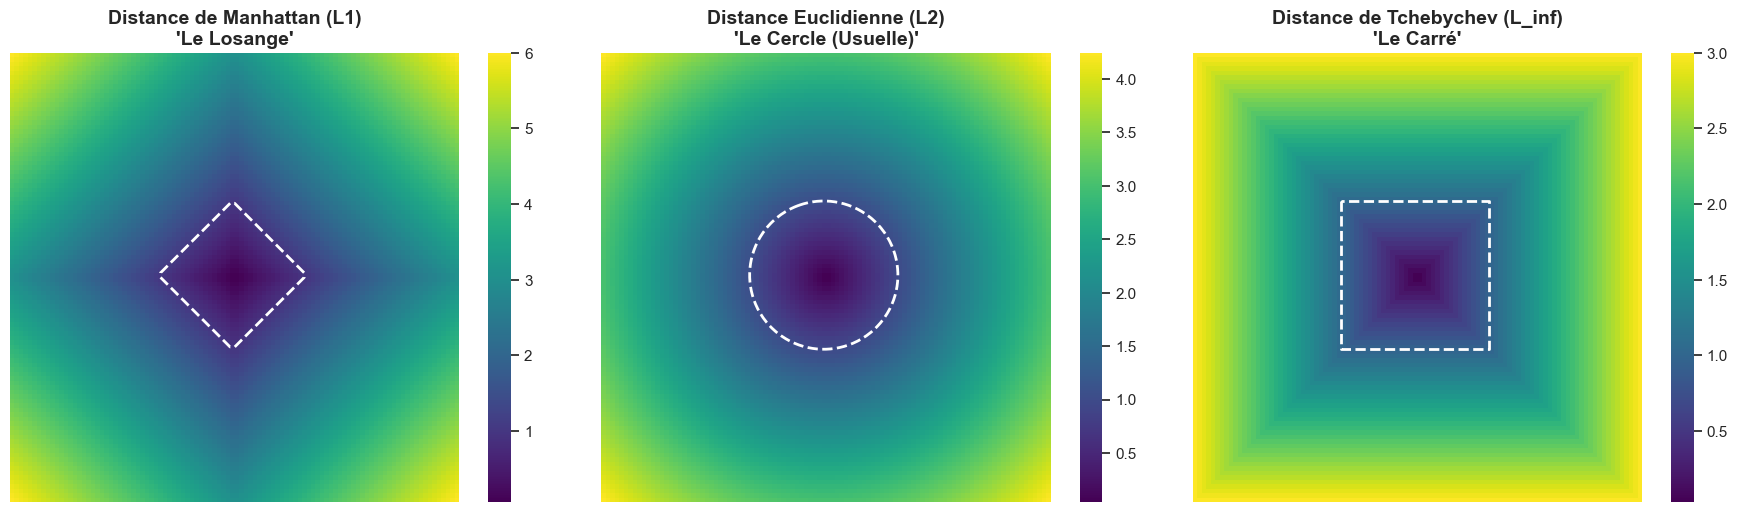

In [2]:
# 1. Préparation des données (une grille de points de -3 à 3)
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# 2. Calcul des distances par rapport au centre (0,0)
# Distance de Manhattan (|x| + |y|)
dist_manhattan = np.abs(X) + np.abs(Y)

# Distance Euclidienne (sqrt(x^2 + y^2))
dist_euclidean = np.sqrt(X**2 + Y**2)

# Distance de Tchebychev (max(|x|, |y|))
dist_chebyshev = np.maximum(np.abs(X), np.abs(Y))

# 3. Visualisation avec Seaborn
# Configuration du style
sns.set_theme(style="white")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Liste pour itérer facilement
distances = [
    (dist_manhattan, "Distance de Manhattan (L1)\n'Le Losange'"),
    (dist_euclidean, "Distance Euclidienne (L2)\n'Le Cercle (Usuelle)'"),
    (dist_chebyshev, "Distance de Tchebychev (L_inf)\n'Le Carré'")
]

for ax, (data, title) in zip(axes, distances):
    # On utilise une heatmap pour voir le "champ" de distance
    # center=0 n'est pas nécessaire ici car ce sont des distances (toujours positives),
    # mais on utilise une colormap progressive (viridis)
    sns.heatmap(
        data,
        ax=ax,
        cbar=True,
        xticklabels=False,
        yticklabels=False,
        cmap="viridis",
        square=True  # Important pour garder la géométrie correcte
    )
    ax.set_title(title, fontsize=14, weight='bold')

    # Ajout d'un contour pour bien voir la forme à distance = 1 (le cercle unitaire)
    # Note: On superpose contour de matplotlib car seaborn ne fait pas de lignes de niveau natives facilement
    ax.contour(data, levels=[1.0], colors='white', linewidths=2, linestyles='--')

plt.tight_layout()
plt.show()

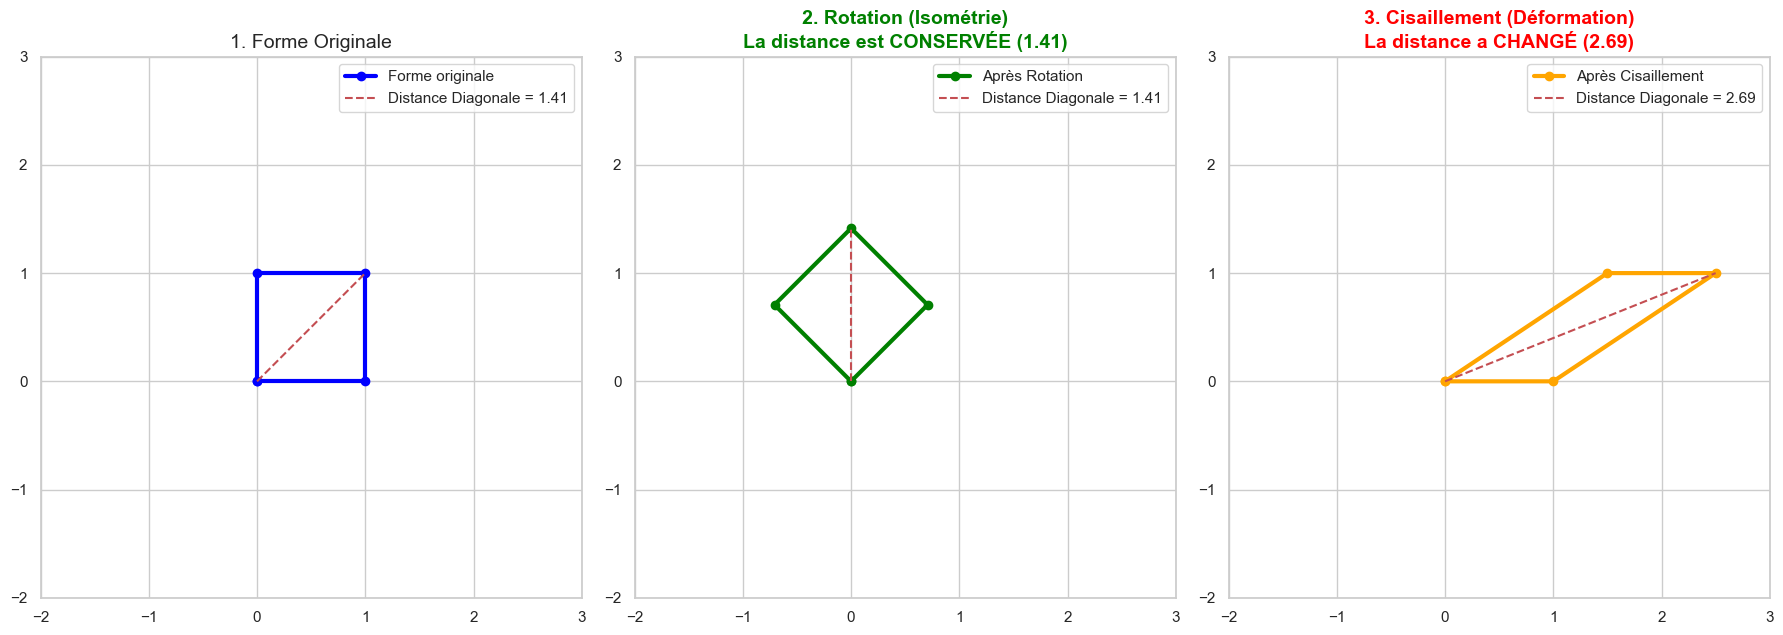

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# 1. Forme originale (Un carré unitaire)
# On définit 4 points : (0,0), (1,0), (1,1), (0,1)
points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0] # On referme la boucle
])

# Fonction pour calculer la distance entre le point 0 et le point 2 (la diagonale)
def get_diagonal_length(pts):
    return np.linalg.norm(pts[0] - pts[2])

# --- Plot 1 : Original ---
dist_orig = get_diagonal_length(points)
ax[0].plot(points[:, 0], points[:, 1], 'o-', linewidth=3, color='blue', label='Forme originale')
ax[0].plot([points[0,0], points[2,0]], [points[0,1], points[2,1]], 'r--', label=f'Distance Diagonale = {dist_orig:.2f}')
ax[0].set_title("1. Forme Originale", fontsize=14)
ax[0].set_xlim(-2, 3); ax[0].set_ylim(-2, 3); ax[0].set_aspect('equal')
ax[0].legend()

# --- Plot 2 : Rotation (Isométrie) ---
# Matrice de rotation (45 degrés)
theta = np.radians(45)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
# Application de la matrice (Produit matriciel)
points_rot = points @ rotation_matrix.T

dist_rot = get_diagonal_length(points_rot)
ax[1].plot(points_rot[:, 0], points_rot[:, 1], 'o-', linewidth=3, color='green', label='Après Rotation')
ax[1].plot([points_rot[0,0], points_rot[2,0]], [points_rot[0,1], points_rot[2,1]], 'r--', label=f'Distance Diagonale = {dist_rot:.2f}')
ax[1].set_title(f"2. Rotation (Isométrie)\nLa distance est CONSERVÉE ({dist_rot:.2f})", fontsize=14, color='green', weight='bold')
ax[1].set_xlim(-2, 3); ax[1].set_ylim(-2, 3); ax[1].set_aspect('equal')
ax[1].legend()

# --- Plot 3 : Cisaillement (Non-Isométrie) ---
# Matrice de cisaillement (Shear)
shear_matrix = np.array([
    [1, 1.5], # On ajoute 1.5*y à x
    [0, 1]
])
points_shear = points @ shear_matrix.T

dist_shear = get_diagonal_length(points_shear)
ax[2].plot(points_shear[:, 0], points_shear[:, 1], 'o-', linewidth=3, color='orange', label='Après Cisaillement')
ax[2].plot([points_shear[0,0], points_shear[2,0]], [points_shear[0,1], points_shear[2,1]], 'r--', label=f'Distance Diagonale = {dist_shear:.2f}')
ax[2].set_title(f"3. Cisaillement (Déformation)\nLa distance a CHANGÉ ({dist_shear:.2f})", fontsize=14, color='red', weight='bold')
ax[2].set_xlim(-2, 3); ax[2].set_ylim(-2, 3); ax[2].set_aspect('equal')
ax[2].legend()

plt.tight_layout()
plt.show()